# Linear regression

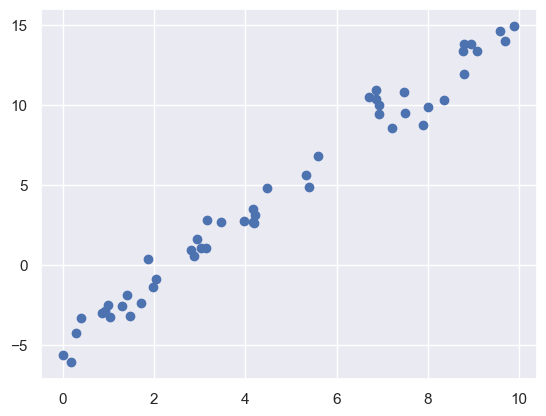

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() 
import numpy as np

rng = np.random.RandomState(1) 
x = 10 * rng.rand(50) 
y = 2 * x - 5 + rng.randn(50) 
plt.scatter(x, y);
plt.show()

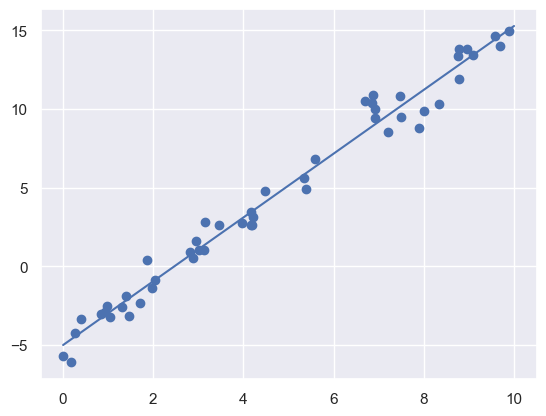

In [6]:
from sklearn.linear_model import LinearRegression 
model = LinearRegression(fit_intercept=True) 
model.fit(x[:, np.newaxis], y) 
xfit = np.linspace(0, 10, 1000) 
yfit = model.predict(xfit[:, np.newaxis]) 
plt.scatter(x, y) 
plt.plot(xfit, yfit);
plt.show()

In [7]:
print("Model slope:", model.coef_[0]) 
print("Model intercept:", model.intercept_)

Model slope: 2.027208810360695
Model intercept: -4.998577085553202


# Multidimensional linear regression
$y=a_0+a_1x_1+...+a_nx_n$

In [8]:
rng = np.random.RandomState(1) 
X = 10 * rng.rand(100, 3) 
y = 0.5 + np.dot(X, [1.5, -2., 1.]) 
model.fit(X, y) 
print(model.intercept_) 
print(model.coef_)

0.5000000000000102
[ 1.5 -2.   1. ]


# Polynomial regression
$y=a_0+a_1x+a_2x^2+...+a_nx^n$

In [9]:
from sklearn.preprocessing import PolynomialFeatures 
x = np.array([2, 3, 4]) 
poly = PolynomialFeatures(3, include_bias=False) 
poly.fit_transform(x[:, None])


array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

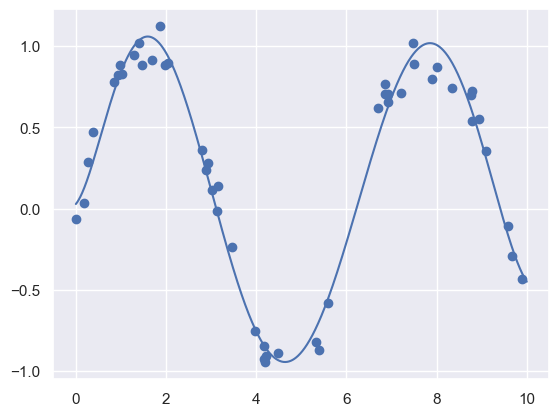

In [11]:
from sklearn.pipeline import make_pipeline 
poly_model = make_pipeline(PolynomialFeatures(7), LinearRegression())
rng = np.random.RandomState(1) 
x = 10 * rng.rand(50) 
y = np.sin(x) + 0.1 * rng.randn(50) 
poly_model.fit(x[:, np.newaxis], y) 
yfit = poly_model.predict(xfit[:, np.newaxis]) 
plt.scatter(x, y) 
plt.plot(xfit, yfit);
plt.show()

# Ridge regression
$$
P = \alpha\sum_{n=1}^N\theta_n^2
$$

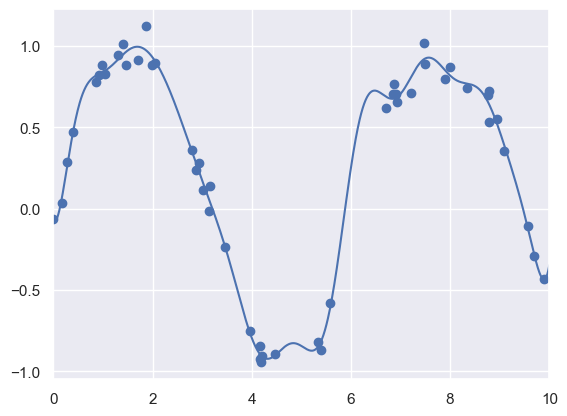

In [12]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input""" 
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor 
        
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis)) 

    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self 
    
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_, self.width_, axis=1)
        
gauss_model = make_pipeline(GaussianFeatures(20),LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);
plt.show()

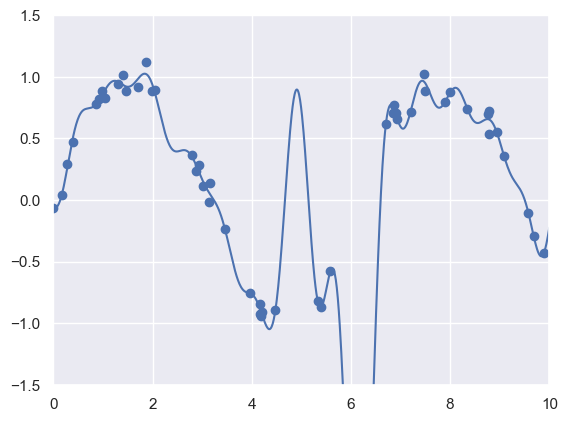

In [14]:
model = make_pipeline(GaussianFeatures(30), LinearRegression()) 
model.fit(x[:, np.newaxis], y) 
plt.scatter(x, y) 
plt.plot(xfit, model.predict(xfit[:, np.newaxis])) 
plt.xlim(0, 10) 
plt.ylim(-1.5, 1.5);
plt.show()

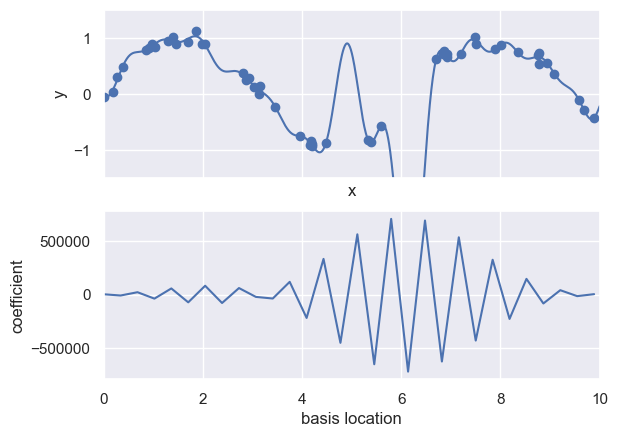

In [15]:
def basis_plot(model, title=None): 
    fig, ax = plt.subplots(2, sharex=True) 
    model.fit(x[:, np.newaxis], y) 
    ax[0].scatter(x, y) 
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis])) 
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5)) 
    if title: 
        ax[0].set_title(title) 
    
    ax[1].plot(model.steps[0][1].centers_, model.steps[1][1].coef_) 
    ax[1].set(xlabel='basis location', ylabel='coefficient', xlim=(0, 10)) 
    
model = make_pipeline(GaussianFeatures(30), LinearRegression()) 
basis_plot(model)
plt.show()

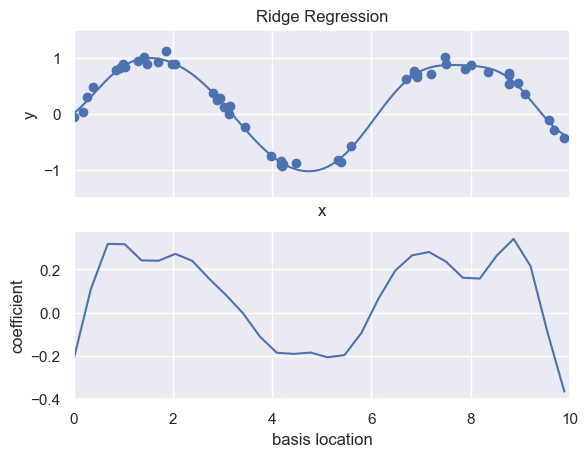

In [17]:
from sklearn.linear_model import Ridge 
model = make_pipeline(GaussianFeatures(30), 
Ridge(alpha=0.1)) 
basis_plot(model, title='Ridge Regression')
plt.show()

# Lasso regression
$$
P = \alpha\sum_{n=1}^N|\theta_n|
$$

C:\Users\34658\anaconda32\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.136e-03, tolerance: 2.065e-03
  model = cd_fast.enet_coordinate_descent(


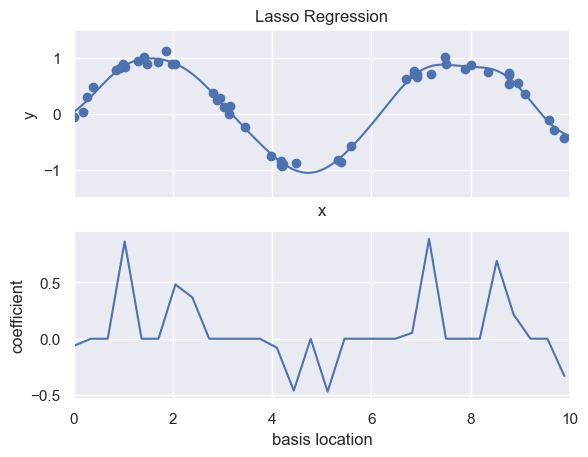

In [18]:
from sklearn.linear_model import Lasso 
model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.001)) 
basis_plot(model, title='Lasso Regression')
plt.show()

# Naïve Bayes

## Bayesian Classification
$$
P(L|features)=\frac{P(features|L)·P(L)}{P(features)}
$$

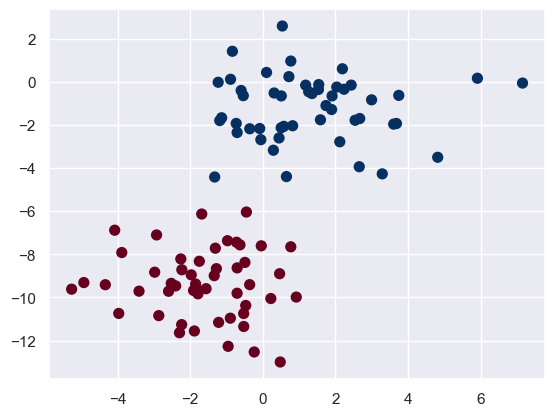

In [121]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; 
sns.set()

from sklearn.datasets import make_blobs 
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5) 
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');
plt.show()

In [122]:
from sklearn.naive_bayes import GaussianNB 
model = GaussianNB() 
model.fit(X, y);

In [123]:
rng = np.random.RandomState(0) 
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2) 
ynew = model.predict(Xnew)
ynew

array([1, 1, 1, ..., 0, 1, 1])

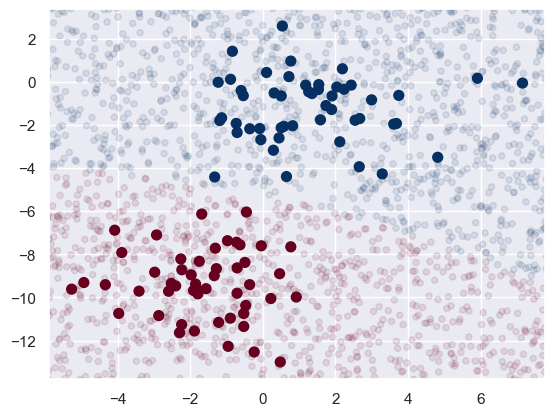

In [124]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu') 
lim = plt.axis() 
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1) 
plt.axis(lim);
plt.show()

In [125]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

# Multinomial Naïve Bayes
## Classifying Text

In [126]:
from sklearn.datasets import fetch_20newsgroups 
data = fetch_20newsgroups() 
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [127]:
categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics'] 
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

print(train.data[5])


From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [128]:
len(train.data)

2153

In [129]:
len(test.data)

1432

In [130]:
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.naive_bayes import MultinomialNB 
from sklearn.pipeline import make_pipeline 

model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(train.data, train.target) 
labels = model.predict(test.data)


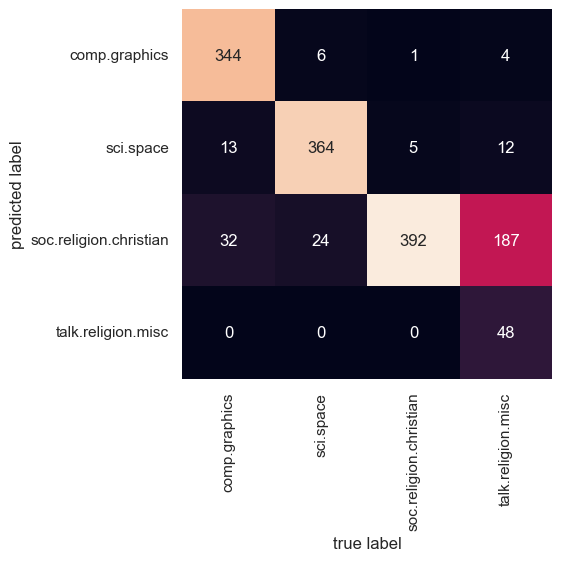

In [131]:
from sklearn.metrics import confusion_matrix 
mat = confusion_matrix(test.target, labels) 
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, 
xticklabels=train.target_names, yticklabels=train.target_names) 
plt.xlabel('true label') 
plt.ylabel('predicted label');
plt.show()

In [132]:
def predict_category(s, train=train, model=model): 
    pred = model.predict([s]) 
    return train.target_names[pred[0]] 
    
predict_category('sending a payload to the ISS') 

'sci.space'

In [133]:
predict_category('discussing islam vs atheism') 

'soc.religion.christian'

In [134]:
predict_category('determining the screen resolution')

'comp.graphics'

# Support vector machines (SVMs)

In [135]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats 
# use seaborn plotting defaults
import seaborn as sns; sns.set()

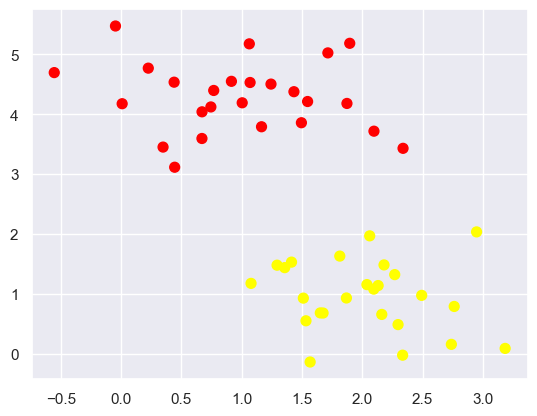

In [136]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60) 
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');
plt.show()

In [137]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10) 
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [138]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, linewidth=1, facecolors='none');
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

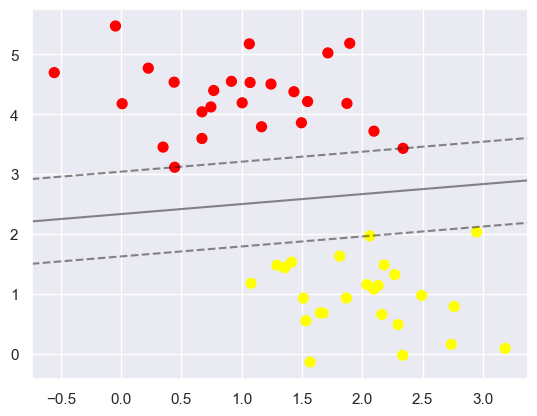

In [139]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn') 
plot_svc_decision_function(model);
plt.show()

In [140]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

# Kernel SVM

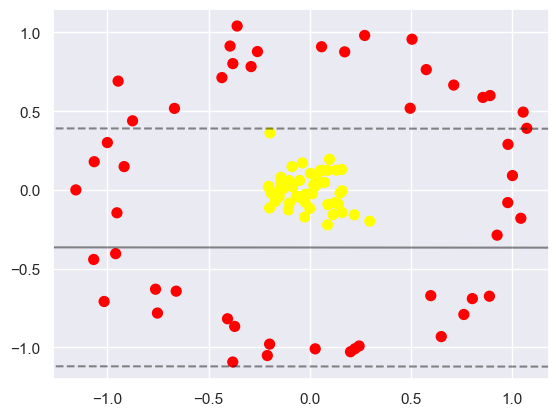

In [141]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1) 
clf = SVC(kernel='linear').fit(X, y) 
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn') 
plot_svc_decision_function(clf, plot_support=False)
plt.show()

In [142]:
r = np.exp(-(X ** 2).sum(1))
r

array([0.9746348 , 0.99923288, 0.29943838, 0.9988475 , 0.97341088,
       0.33843221, 0.36126607, 0.97591097, 0.98089935, 0.3343645 ,
       0.34426686, 0.98913304, 0.9834907 , 0.98603631, 0.9831978 ,
       0.99418087, 0.31516344, 0.88037604, 0.92923855, 0.97863644,
       0.37163506, 0.9863953 , 0.26323822, 0.97079568, 0.35312728,
       0.36299287, 0.33994098, 0.42817249, 0.38643008, 0.99380951,
       0.99856444, 0.49776482, 0.2624772 , 0.25301295, 0.35464135,
       0.99855535, 0.97233445, 0.44972182, 0.98354979, 0.99226164,
       0.38084343, 0.44547276, 0.98267761, 0.94892796, 0.31138609,
       0.9946958 , 0.96629929, 0.95473683, 0.31701602, 0.84400538,
       0.26291488, 0.97734517, 0.32546423, 0.42177666, 0.2753255 ,
       0.99499016, 0.35169663, 0.97041789, 0.4546884 , 0.98130186,
       0.28808028, 0.96429072, 0.43571493, 0.97803337, 0.97423777,
       0.95886891, 0.41152929, 0.36899233, 0.39504155, 0.97382097,
       0.9596929 , 0.48919029, 0.39023229, 0.59677054, 0.94473

In [143]:
clf =SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

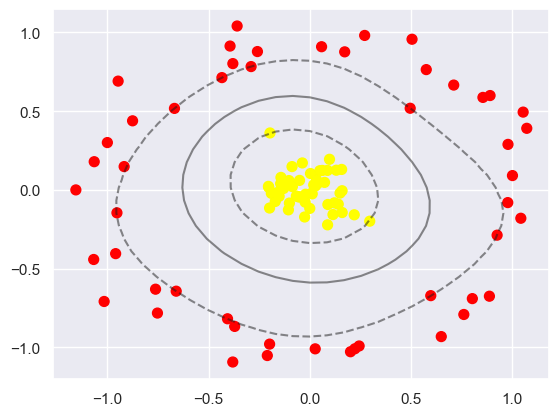

In [144]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn') 
plot_svc_decision_function(clf) 
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=300, lw=1, facecolors='none');
plt.show()

# SVM overlap

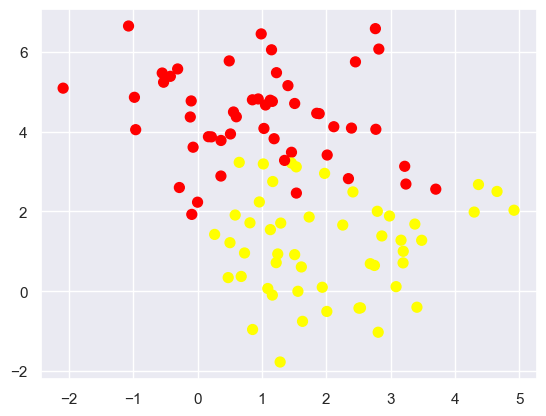

In [145]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.2) 
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');
plt.show()

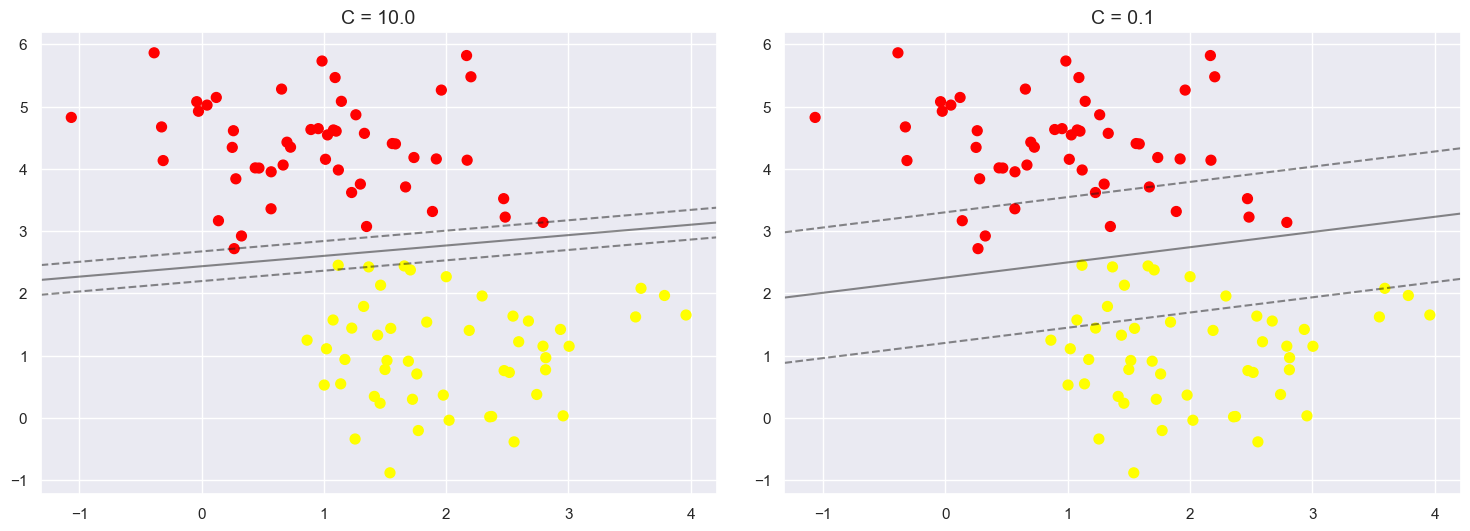

In [146]:
X, y = make_blobs(n_samples=100, centers=2,
random_state=0, cluster_std=0.8)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)
plt.show()

# Decision Trees Random Forest
## Random Forest

In [147]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

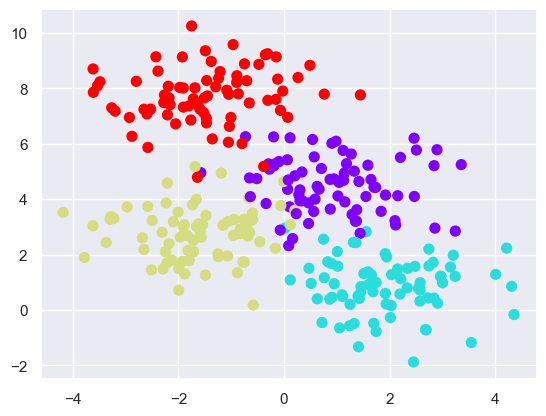

In [148]:
from sklearn.datasets import make_blobs 
X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=1.0) 
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
tree = DecisionTreeClassifier().fit(X, y)

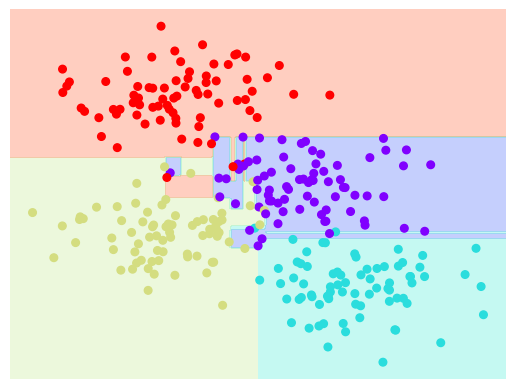

In [150]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'): 
    ax = ax or plt.gca() 
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap, clim=(y.min(), y.max()), zorder=3) 
    ax.axis('tight') 
    ax.axis('off') 
    xlim = ax.get_xlim() 
    ylim = ax.get_ylim() 
    # fit the estimator
    model.fit(X, y) 
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200), np.linspace(*ylim, num=200)) 
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape) 
    # Create a color plot with the results
    n_classes = len(np.unique(y)) 
    contours = ax.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(n_classes + 1) - 0.5, cmap=cmap, zorder=1) 
    ax.set(xlim=xlim, ylim=ylim)

visualize_classifier(DecisionTreeClassifier(), X, y)
plt.show()

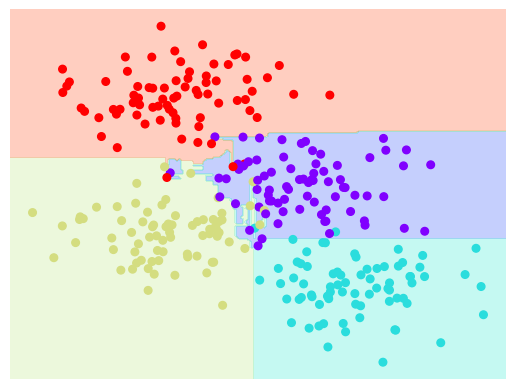

In [151]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier 

tree = DecisionTreeClassifier() 
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1) 
bag.fit(X, y) 
visualize_classifier(bag, X, y)

plt.show()

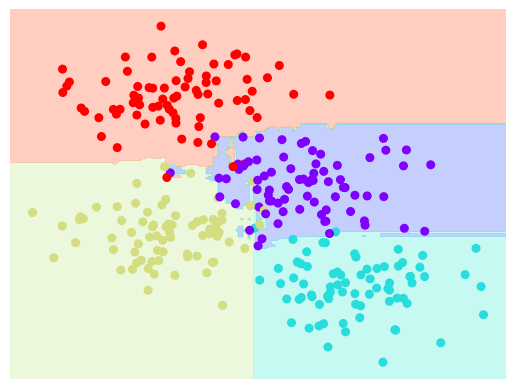

In [152]:
from sklearn.ensemble import RandomForestClassifier 
model = RandomForestClassifier(n_estimators=100, random_state=0) 
visualize_classifier(model, X, y);
plt.show()

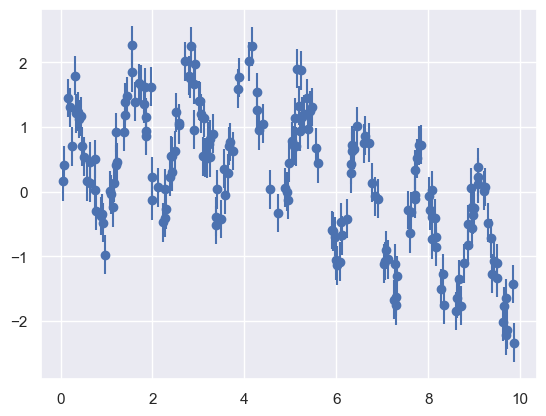

In [153]:
rng = np.random.RandomState(42) 
x = 10 * rng.rand(200) 
def model(x, sigma=0.3): 
    fast_oscillation = np.sin(5 * x) 
    slow_oscillation = np.sin(0.5 * x) 
    noise = sigma * rng.randn(len(x)) 
    return slow_oscillation + fast_oscillation + noise 
y = model(x) 
plt.errorbar(x, y, 0.3, fmt='o');
plt.show()

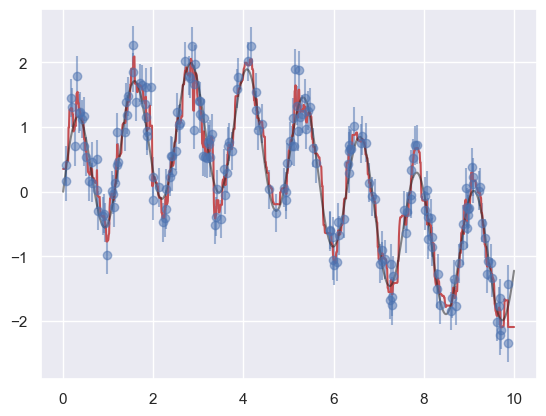

In [154]:
from sklearn.ensemble import RandomForestRegressor 
forest = RandomForestRegressor(200) 
forest.fit(x[:, None], y) 
xfit = np.linspace(0, 10, 1000) 
yfit = forest.predict(xfit[:, None]) 
ytrue = model(xfit, sigma=0) 
plt.errorbar(x, y, 0.3, fmt='o', alpha=0.5) 
plt.plot(xfit, yfit, '-r'); 
plt.plot(xfit, ytrue, '-k', alpha=0.5);
plt.show()

# Classifying digits

In [155]:
from sklearn.datasets import load_digits
digits = load_digits() 
digits.keys()


dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

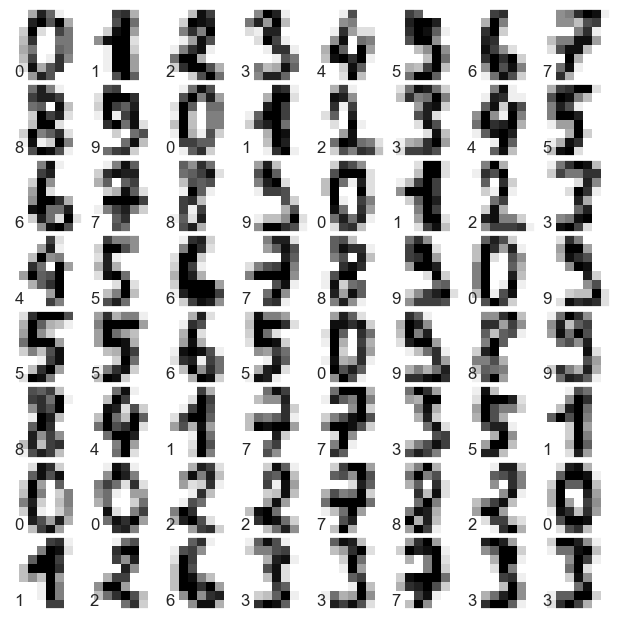

In [156]:
from sklearn.datasets import load_digits 
digits = load_digits() 
# set up the figure
fig = plt.figure(figsize=(6, 6)) # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) 
# plot the digits: each image is 8x8 pixels
for i in range(64): 
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[]) 
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest') 
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

plt.show()


In [157]:
from sklearn.model_selection import train_test_split 
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target, 
random_state=0) 
model = RandomForestClassifier(n_estimators=1000) 
model.fit(Xtrain, ytrain) 
ypred = model.predict(Xtest)

from sklearn import metrics 
print(metrics.classification_report(ypred, ytest))


              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       1.00      0.96      0.98        45
           2       0.95      1.00      0.98        42
           3       0.98      0.98      0.98        45
           4       0.97      1.00      0.99        37
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      0.96      0.98        50
           8       0.94      0.98      0.96        46
           9       0.98      0.98      0.98        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



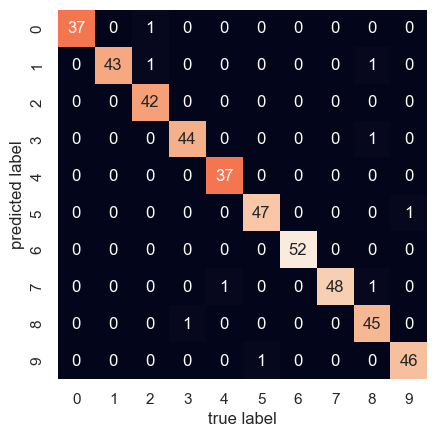

In [158]:
from sklearn.metrics import confusion_matrix 
mat = confusion_matrix(ytest, ypred) 
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False) 
plt.xlabel('true label') 
plt.ylabel('predicted label');
plt.show()

# Neuronal Networks

In [4]:
from sklearn.neural_network import MLPClassifier 
X = [[0., 0.], [1., 1.]] 
y = [0, 1] 
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1) 
clf.fit(X, y)
clf.predict([[2., 2.], [-1., -2.]])

array([1, 0])

Automatically created module for IPython interactive environment
Iteration 1, loss = 0.32009978
Iteration 2, loss = 0.15347534
Iteration 3, loss = 0.11544755
Iteration 4, loss = 0.09279764
Iteration 5, loss = 0.07889367
Iteration 6, loss = 0.07170497
Iteration 7, loss = 0.06282111
Iteration 8, loss = 0.05530788
Iteration 9, loss = 0.04960484
Iteration 10, loss = 0.04645355
Training set score: 0.986800
Test set score: 0.970000


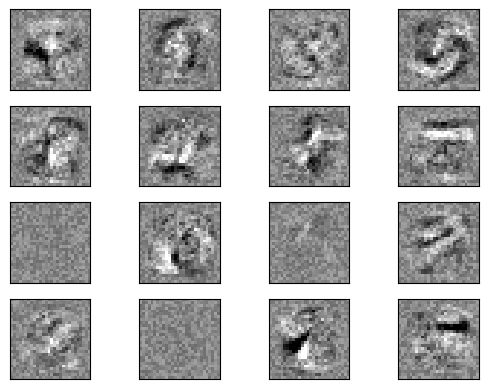

In [5]:
import warnings
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier
print(__doc__)

# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X / 255.
# rescale the data, use the traditional train/test split
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4, solver='sgd', verbose=10, random_state=1, learning_rate_init=.1)
# this example won't converge because of CI's time constraints, so we catch the
# warning and are ignore it here
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    mlp.fit(X_train, y_train)
    
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))
fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin, vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()
